In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
df = pd.read_csv('avacado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [5]:
df["type"].value_counts()

conventional    1517
Name: type, dtype: int64

In [6]:
df["region"].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [7]:
df.shape

(16468, 14)

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [10]:
# dropping the null values and storing the new dataframe in df_drop
df= df.dropna()

In [11]:
# checking the shape of the new df
df.shape

(1517, 14)

In [12]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
# checking the df shape after dropping null values
df.shape

(1517, 14)

<function matplotlib.pyplot.show(*args, **kw)>

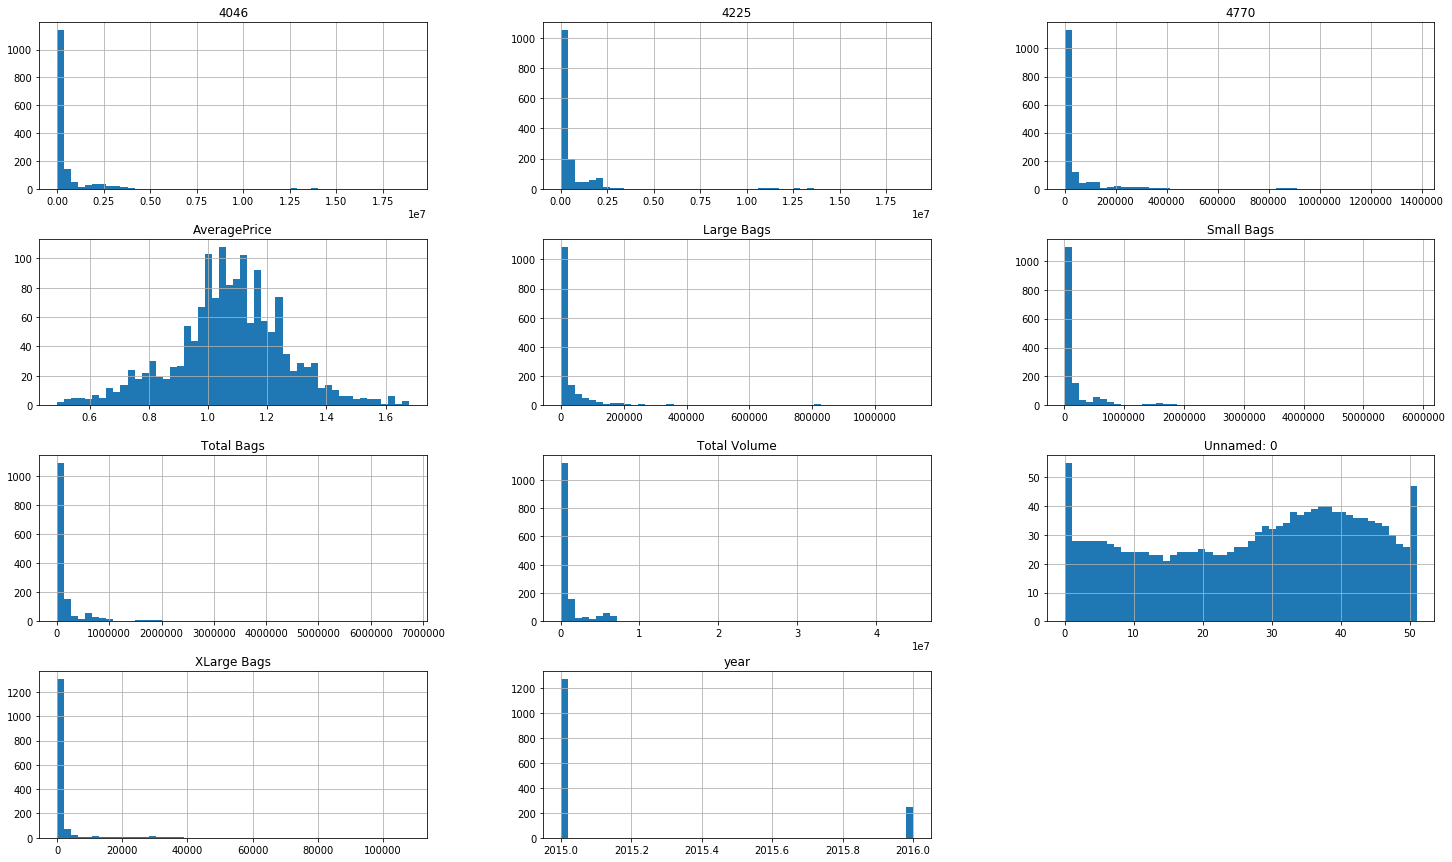

In [14]:
# checking the distribution for each feature
df.hist(bins=50,figsize=(25,15))
plt.show

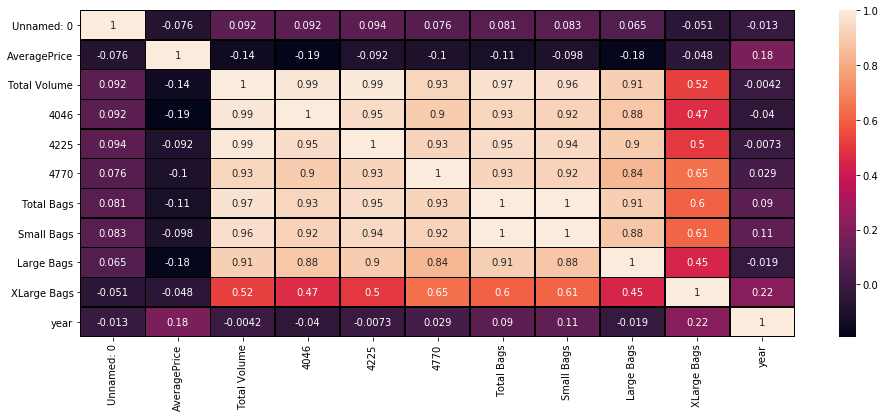

In [15]:
plt.figure(figsize = (16,6))
sns.heatmap(df.corr(), linewidths = .5, linecolor = 'black', annot = True)

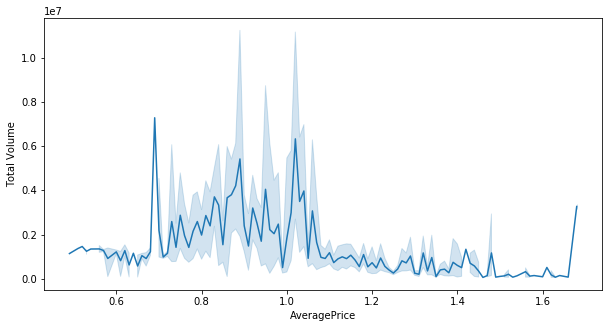

In [16]:
plt.figure (figsize = (10,5))
sns.lineplot( x = 'AveragePrice' , y = 'Total Volume' , data = df)

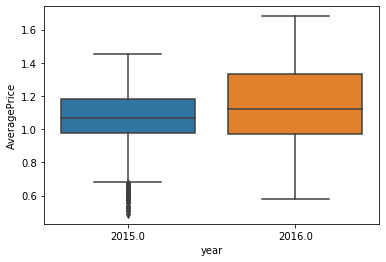

In [17]:
plt.subplot()
sns.boxplot( x= 'year' , y = 'AveragePrice' , data = df)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x720 with 0 Axes>

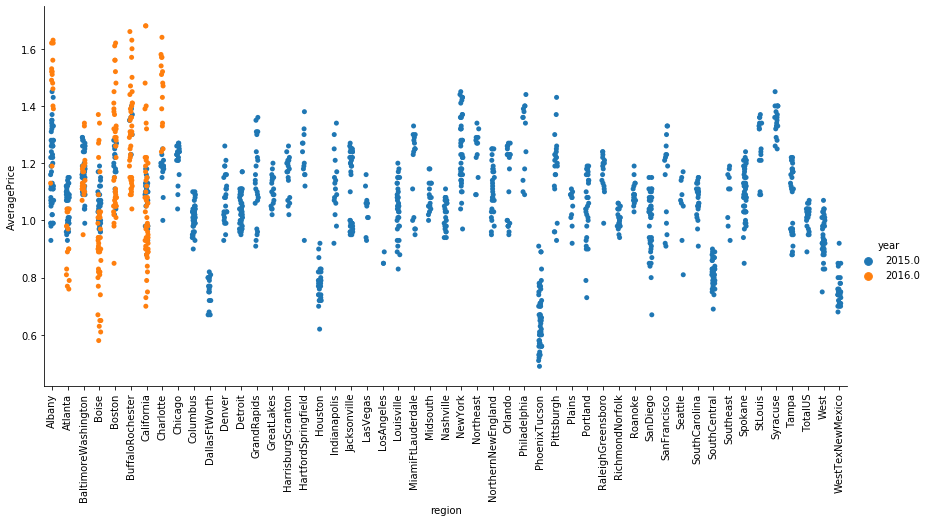

In [18]:
plt.figure(figsize= (15,10))
sns.catplot( x = 'region' , y = 'AveragePrice' , hue = 'year', height=6, aspect=2 , data = df)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x720 with 0 Axes>

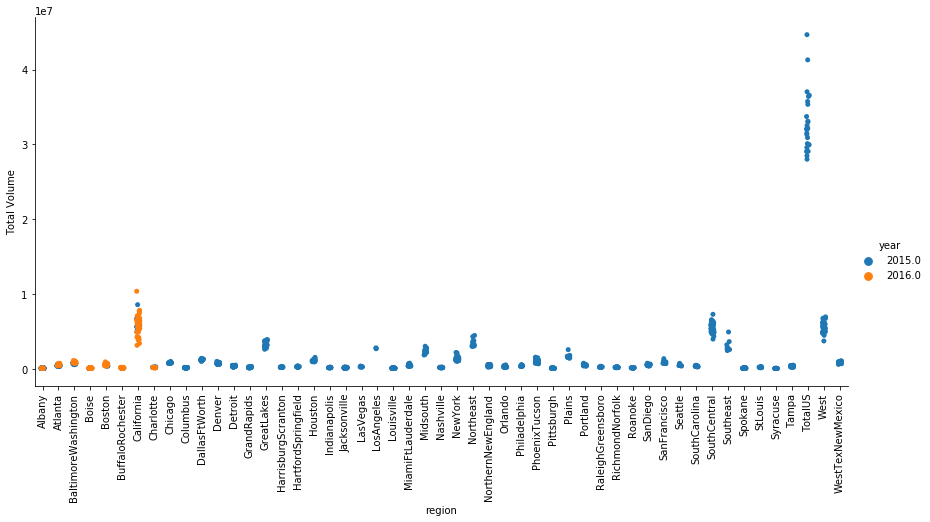

In [19]:
plt.figure(figsize= (15,10))
sns.catplot( x = 'region' , y = 'Total Volume' , hue = 'year', height=6, aspect=2 , data = df)
plt.xticks(rotation=90)
plt.show

In [20]:
df_new = df
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['Month'] = df_new['Date'].dt.month
df_new['Day'] = df_new['Date'].dt.day
df_new['year'] = df_new['year'].astype('int')

In [21]:
df_new.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int32
region                  object
Month                    int64
Day                      int64
dtype: object

In [22]:
df_new['Month'].value_counts()

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: Month, dtype: int64

In [23]:
df_new.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


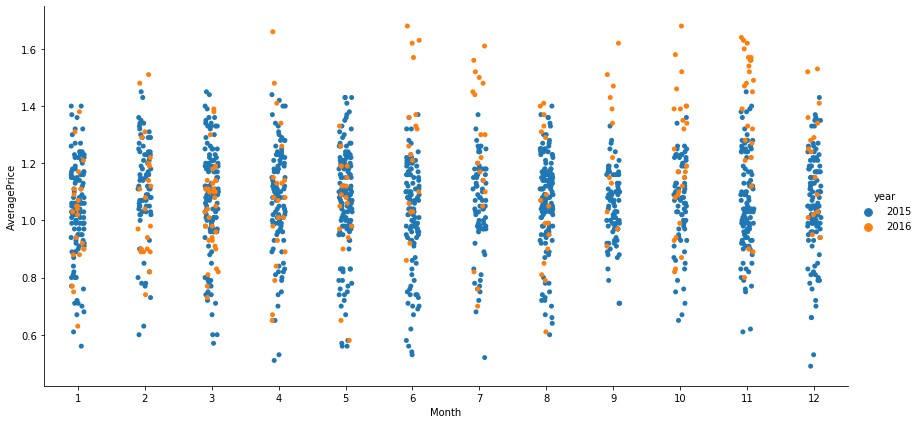

In [24]:
sns.catplot( x ='Month'  ,y = 'AveragePrice' , hue = 'year' ,height=6, aspect=2, data = df_new)

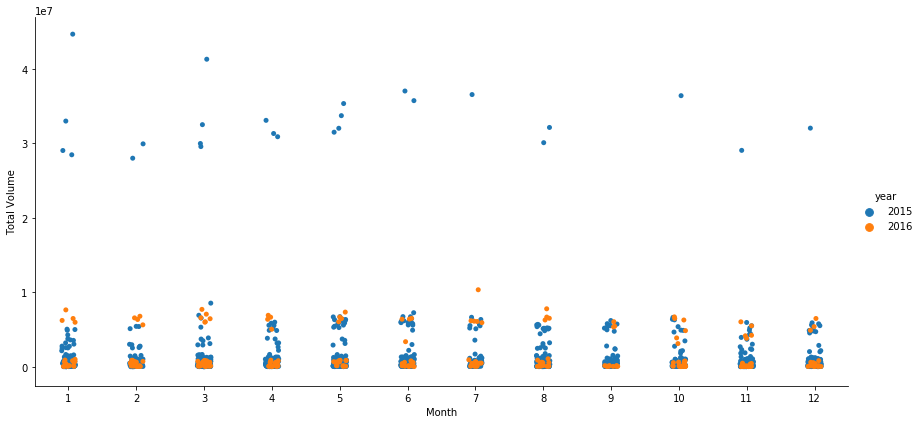

In [25]:
sns.catplot( x ='Month'  ,y = 'Total Volume', hue = 'year' ,height=6, aspect=2, data = df_new)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x720 with 0 Axes>

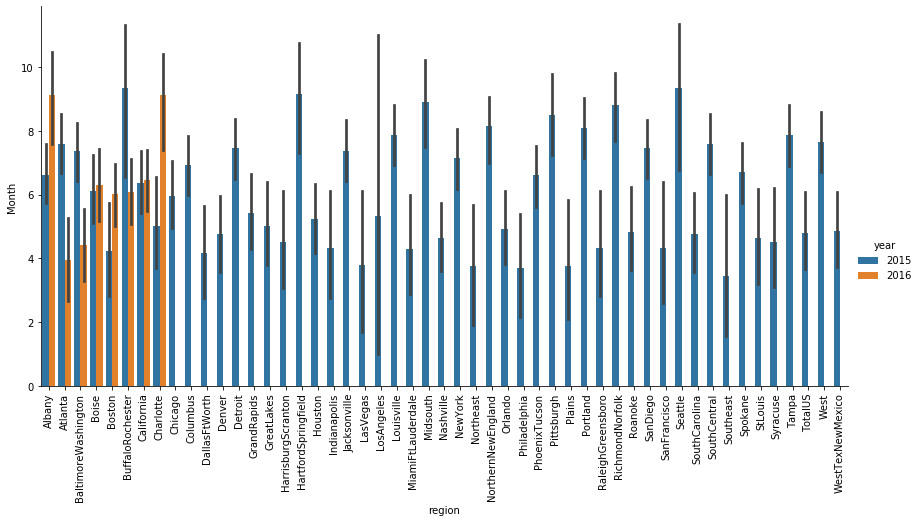

In [26]:
plt.figure(figsize= (15,10))
sns.catplot( x = 'region' , y = 'Month' , hue = 'year', height=6, aspect=2 , data = df_new, kind = "bar")
plt.xticks(rotation=90)
plt.show

In [27]:
# Deleting the unwanted columns
df_drop = df_new.drop(['Unnamed: 0','type','region','Date'], axis = 1)

In [28]:
df_drop.shape

(1517, 12)

In [29]:
from scipy.stats import zscore
z_scr=zscore(df_drop)
df_final=df_drop.loc[(abs(z_scr)<3).all(axis=1)]
print(df_final.shape)

(1436, 12)


In [30]:
x = df_final.drop(['AveragePrice'], axis = 1)

In [31]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [32]:
y = pd.DataFrame(df_final['AveragePrice'])

In [33]:
y.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [34]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=74)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1148, 11)
Shape of y_train =  (1148, 1)
Shape of X_test =  (288, 11)
Shape of y_test =  (288, 1)


In [35]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(x_train)
x_train= ms.transform(x_train)
x_test= ms.transform(x_test)

In [36]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [37]:
# Checking the best random state for max R2 score
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

max r2 score corresponding to  99  is  0.28623180793243597


In [38]:
#Lets check lasso regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [39]:
#Lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

max r2 score corresponding to  46  is  0.2687704712122784


In [40]:
#Lets check max r2 score when we use Ridge
Rsreg=Ridge(alpha=0.1)
r_state=maxr2_score(Rsreg,x,y)

max r2 score corresponding to  99  is  0.2862129180963663


In [41]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
knr=KNeighborsRegressor()
neighbors={"n_neighbors":range(1,30)}
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 28}

In [42]:
#Lets use KNN regression and chcek max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=28)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  73  is  0.6772949772516199


In [43]:
dtr =DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

max r2 score corresponding to  87  is  0.7563998804077963


In [44]:
adr =AdaBoostRegressor()
r_state=maxr2_score(adr,x,y)

max r2 score corresponding to  90  is  0.6825871289937513


In [45]:
rdfr = RandomForestRegressor()
r_state=maxr2_score(rdfr,x,y)

max r2 score corresponding to  88  is  0.8484098514175947


In [46]:
gbr=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 )
r_state=maxr2_score(gbr,x,y)

max r2 score corresponding to  74  is  0.5356628140426055


In [47]:
xgr =XGBRegressor()
r_state=maxr2_score(xgr,x,y)

max r2 score corresponding to  93  is  0.866733726355404


In [48]:
LR=LinearRegression(normalize=True)
LA=Lasso(alpha=1 , random_state= 46 )
RI=Ridge(alpha=1 , random_state= 46)
EN=ElasticNet(alpha=1 , random_state= 46)
KNR=KNeighborsRegressor(n_neighbors= 28)
DTR=DecisionTreeRegressor(random_state=87)
ABR=AdaBoostRegressor(random_state=90)
RFR=RandomForestRegressor(random_state=85)
GBR=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 ,random_state=63)
XGR=XGBRegressor(random_state=93)

In [49]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [50]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:   
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)    
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)    
    MSE.append(round(mse,3))
    score= cross_val_score(model,x_test,y_test).mean()    
    cvs.append(round(score,3))

In [51]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.255557,0.025,0.226
1,Lasso,-0.000104,0.034,-0.009
2,Ridge,0.249343,0.025,0.209
3,ElasticNet,-0.000104,0.034,-0.009
4,DecisionTreeRegressor,0.671011,0.011,0.432
5,KNeighborsRegressor,0.371396,0.021,0.133
6,AdaBoostRegressor,0.657148,0.012,0.615
7,RandomForestRegressor,0.846207,0.005,0.677
8,GradientBoostingRegressor,0.535630,0.016,0.493
9,XGBRegressor,0.837018,0.006,0.631


In [54]:
# As we can see from above trials the best performance is given by XGBRegressor so it is the final model selected

In [55]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(XGR,'Avacado.pkl')

['Avacado.pkl']